# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/vehicles_us.csv')
try:
    display(df.head(10)) #print first 10 rows
    display(df.info()) #print general info
except:
    display('Cannot import dataframe')
#The data is displayed 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

In [2]:
df.isna().mean() * 100

report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)



,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


In [3]:
#Next, seeing if any 'None' str type missing values exist
none_values = df[df == 'None'].sum()
none_values
#No None values exist, great!

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

### Conclusion

There are 51525 car ads in the data.

There are 13 columns: price, model_year, model, condition, cylinders, fuel, odometer transmission, type, paint_color, is_4wd, date_posted, and days_listed.

Missing values are observed in multiple columns: model_year, cylinders, odometer, paint_color, and is_4wd.

The missing value columns effect more than .5% of the data and should be filled in with representative values.

No 'None' str values were present.

'odometer' and 'model_year' should be changed to int types rather than float for visualization

'condition' values need to be encoded numerical so that they can be automatically plotted

## Data preprocessing

In [4]:
#Since there is more than 10% of the data missing, using the medians for all the columns is the safest strategy
df[['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']].median().astype('int')
#these are all the representative values for each column with missing values

model_year      2011
cylinders          6
odometer      113000
is_4wd             1
dtype: int64

In [5]:
#Next, going through each column and filling in with the median

df['model_year'].fillna(df['model_year'].median().astype('int'), inplace=True) 
#mode is expressed as int, fillna is used to fill the NaN values with the mode, [0] is used
#to access the mode value since mode() returns a series object
df['model_year'].isnull().sum() #checking to see if NaN values had been replaced

0

In [6]:
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median()) #filling NaN with median
df['cylinders'].isnull().sum() #NaN's have been filled

0

In [7]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median().astype('int'))
#filling in NaN values with the mean expressed as an integer for visualization
df['odometer'].isnull().sum() #checking if it worked

0

In [8]:
#paint_color -- categorical -- mode
df['paint_color'].fillna(df['paint_color'].mode()[0], inplace=True) #filling in the mode for missing values
df['paint_color'].isnull().sum() #checking if it worked


0

In [9]:
#is_4wd is suspicious because of the large amount of missing values. Let's see what happens to the
#data when the values are filled with the mean '1' aka "is a 4wd vehicle".

#df['is_4wd'] = df['is_4wd'].fillna(df['is_4wd'].mean()) #filling NaN with the mean
#df['is_4wd'].value_counts() #identifying all unique values

#There is only one unique value when we replace missing values with the mean, which does not add up.
#Therefore, these missing values were meant as "not a 4wd"
#These values should be filled in with a '0' to represent no

df['is_4wd'] = df['is_4wd'].fillna(0).astype('int')
df['is_4wd'].value_counts()
#This makes more sense! Now to change value types

0    25953
1    25572
Name: is_4wd, dtype: int64

In [10]:
#Now that all of the missing values have been filled, it is time to change value types
#for 'odometer' and 'model_year' for visualization purposes

df['odometer'] = df['odometer'].astype('int')
df['model_year'] = df['model_year'].astype('int')
df.head()
#They have been successfully converted

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,white,1,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,113000,automatic,pickup,white,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0,2019-04-02,28


In [11]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [12]:
#Encode the 'condition' values
condition_nums = {"condition": {"new": 5, "like new": 4, "excellent": 3, "good": 2,
                                  "fair": 1, "salvage": 0 }}
df = df.replace(condition_nums)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,2,6.0,gas,145000,automatic,SUV,white,1,2018-06-23,19
1,25500,2011,ford f-150,2,6.0,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,4,4.0,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,1,8.0,gas,113000,automatic,pickup,white,0,2019-03-22,9
4,14900,2017,chrysler 200,3,4.0,gas,80903,automatic,sedan,black,0,2019-04-02,28


In [13]:
#checking for duplicate rows
df.duplicated().sum() #there are no duplicate rows

0

In [14]:
#checking for duplicates in categorical data
display(df['fuel'].value_counts())
display(df['transmission'].value_counts())
display(df['type'].value_counts()) 
#no duplicates

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

### Conclusion 

Missing values for the columns model_year, cylinders, odometer, paint_color, and is_4wd have been filled with their respective representative variables

Possible explanations for these missing values: the people uploading these advertisements are the car owners themselves and chose to omit certain values, or do not know the information themselves. For examples, missing values in paint_color could be the result of the owners not being able to distinguish a certain color. is_4wd can be explained because the vehicle was not 4wd. Odometer could be missing for various reasons, such as they chose to omit it or the odometer doesn't work. Lastly, cylinders could be missing because the owners do not know that information about their vehicle.

Values for 'odometer' and 'model_year' have been changed to int64 for visualization purposes

The 'condition' column was encoded for graph automation

## Make calculations and add them to the table

In [15]:
#Next calculate: day of the week, month, and year the ad was placed
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df['day_of_week'] = df['date_posted'].dt.day_name()
df['day_of_week'].value_counts()
#Thursdays were the most popular day to post a listing

Thursday     7510
Saturday     7392
Sunday       7356
Monday       7339
Friday       7334
Wednesday    7299
Tuesday      7295
Name: day_of_week, dtype: int64

In [16]:
#Month
df['month'] = df['date_posted'].dt.month_name()
df['month'].value_counts()
#The highest month for ads was October and the lowest month was April

October      4643
December     4564
March        4559
May          4503
August       4480
July         4471
January      4452
September    4452
November     4354
June         4216
February     4014
April        2817
Name: month, dtype: int64

In [17]:
#Year
df['year'] = df['date_posted'].dt.year
df['year'].value_counts()
#The data spans across two years
#The amount of ads for cars dropped by more than half of the previous year

2018    35683
2019    15842
Name: year, dtype: int64

In [18]:
#Next, add the vehicle's age (in years) when the ad was placed
df['vehicle_age'] = 1 + (df['year'] - df['model_year'])
df['vehicle_age'].head()

0     8
1     8
2     7
3    17
4     3
Name: vehicle_age, dtype: int64

### Conclusion

The table was updated with new columns for: day of the week, month, year the ad was placed, vehicle age, and miles per year

Thursdays were the most popular day to post a listing: perhaps many sellers knew buyers
#would have more time to browse on the weekend?

The highest month for ads was October and the lowest month was April

The amount of ads for cars dropped by more than half of the previous year

## Carry out exploratory data analysis

In [19]:
#Next, exploring the parameters: price, vehicle's age when the ad was placed, mileage, 
#number of cylinders, and condition by viewing their histograms
df_parameters = df[['price', 'vehicle_age', 'cylinders', 'odometer', 'condition']].copy() #new df for parameters
df_parameters.head(10)

,price,vehicle_age,cylinders,odometer,condition
0,9400,8,6.0,145000,2
1,25500,8,6.0,88705,2
2,5500,7,4.0,110000,4
3,1500,17,8.0,113000,1
4,14900,3,4.0,80903,3
5,14990,5,6.0,57954,3
6,12990,4,4.0,79212,3
7,15990,7,6.0,109473,3
8,11500,7,4.0,104174,3
9,9200,12,6.0,147191,3


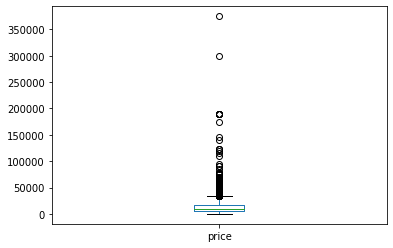

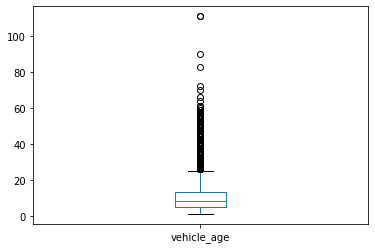

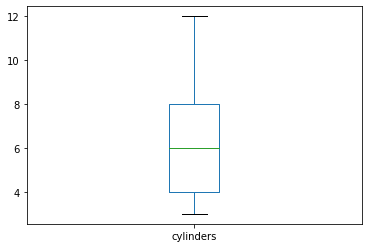

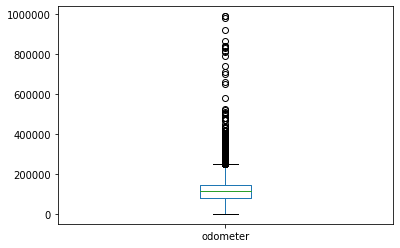

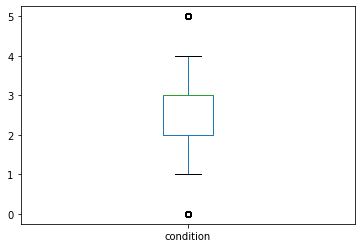

In [20]:
import matplotlib.pyplot as plt

df_parameters['price'].plot.box(by=None)
plt.show()
df_parameters['vehicle_age'].plot.box(by=None)
plt.show()
df_parameters['cylinders'].plot.box(by=None)
plt.show()
df_parameters['odometer'].plot.box(by=None)
plt.show()
df_parameters['condition'].plot.box(by=None)
plt.show()
#outliers make each graph a little difficult to read for odometer, price, and vehicle_age
#it is best to remove the outliers

#### Removing Outliers

In [21]:
Q1 = df_parameters.quantile(0.25)
Q3 = df_parameters.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price          11839.0
vehicle_age        8.0
cylinders          4.0
odometer       67360.0
condition          1.0
dtype: float64


In [22]:
df_outliers = df_parameters[((df_parameters < (Q1 - 1.5 * IQR)) |(df_parameters > (Q3 + 1.5 * IQR))).any(axis=1)]
df_parameters = df_parameters[~((df_parameters < (Q1 - 1.5 * IQR)) |(df_parameters > (Q3 + 1.5 * IQR))).any(axis=1)] #excluding the outliers
df_outliers.info() #there were 3664 outliers
df_parameters.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 33 to 51521
Data columns (total 5 columns):
price          3664 non-null int64
vehicle_age    3664 non-null int64
cylinders      3664 non-null float64
odometer       3664 non-null int64
condition      3664 non-null int64
dtypes: float64(1), int64(4)
memory usage: 171.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47861 entries, 0 to 51524
Data columns (total 5 columns):
price          47861 non-null int64
vehicle_age    47861 non-null int64
cylinders      47861 non-null float64
odometer       47861 non-null int64
condition      47861 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.2 MB


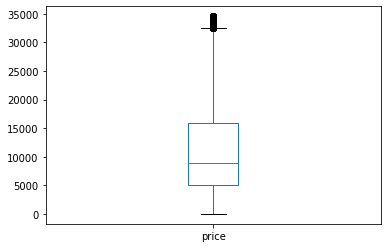

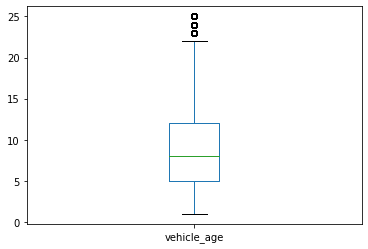

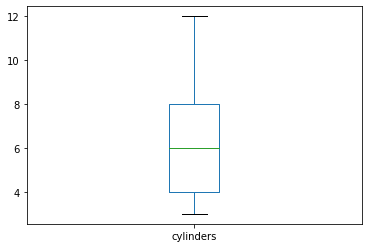

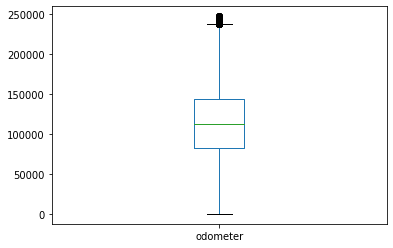

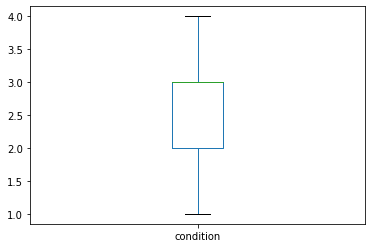

In [23]:
#Next to reprint the boxplots from before
df_parameters['price'].plot.box(by=None)
plt.show()
df_parameters['vehicle_age'].plot.box(by=None)
plt.show()
df_parameters['cylinders'].plot.box(by=None)
plt.show()
df_parameters['odometer'].plot.box(by=None)
plt.show()
df_parameters['condition'].plot.box(by=None)
plt.show()

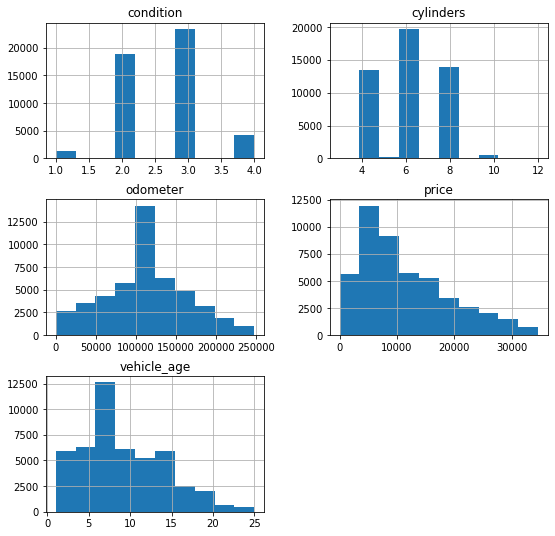

In [24]:
#Now that outliers have been removed, we can view their histograms
df_parameters.hist(figsize=(9,9))
plt.show()

#### Boxplot Data

The previous boxplots were difficult to read due to the outliers, but now that they have been removed the data is much more readable. We can also now view their histograms

The largest value for condition is excellent (3) and the lowest values are salvages (0) and new (5)

6 cylinder vehicles were the most common listing while lowest values were lower than 4 and greater than 10 cylinders

Many vehicles were listed had approximately 100,000 - 125000 miles

Many vehicles had a cheaper price listing -- the median is appx 8000

Vehicles were most often 5 - 10 years in age

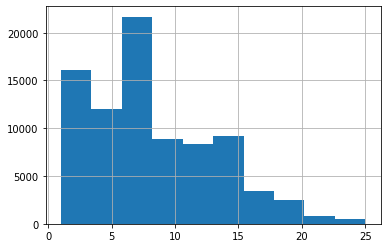

In [25]:
#merging df and df_parameters
df = pd.merge(df, df_parameters,  how='right', left_on=['condition','cylinders', 'odometer', 'price', 'vehicle_age'], right_on = ['condition','cylinders', 'odometer', 'price', 'vehicle_age'])
df['vehicle_age'].hist() #testing if merge worked


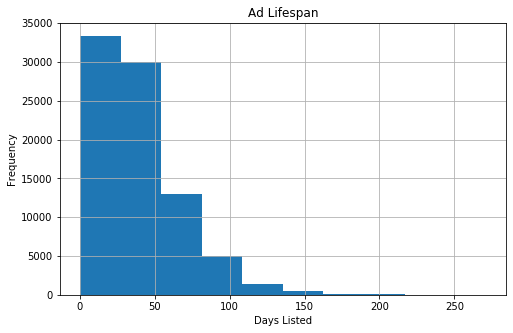

In [26]:
fig, ax = plt.subplots(figsize=(8,5))

days_listed = df['days_listed'].plot(grid=True, kind = 'hist', title='Ad Lifespan')
ax.set_xlabel('Days Listed')
ax.set_ylabel('Frequency')
plt.show()
#Many vehicles were sold within 50 days, more so within 25 days.

In [27]:
#Calculating the mean and mean for 'days_listed'
print(df['days_listed'].mean())
print(df['days_listed'].median())
#There is about a 15% difference between mean and median, meaning that there are a significant
#amount of vehicles that are taking longer to sell -- what factors are causing this?


39.6361619722532
34.0


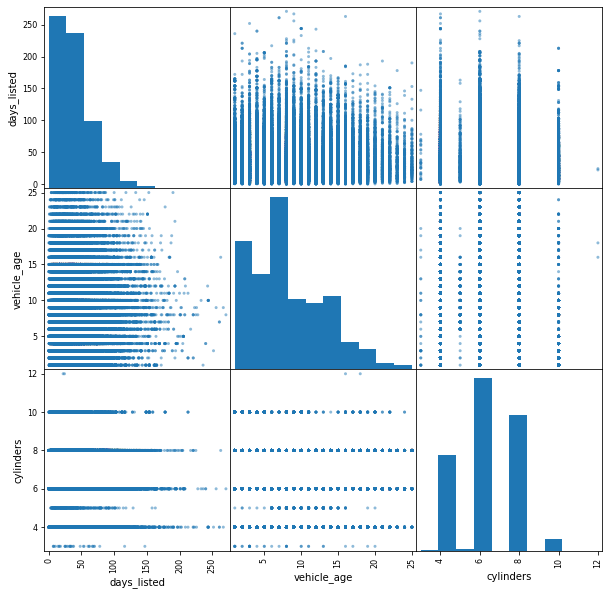

In [28]:
#Next, to view the relationships affecting 'days_listed' two scatter matrices will be used
#in order to better visualize the data (one matrix is too and it is not possible to
#slice the matrix for only the 'days_listed' column)

df_parameters1 = df[['days_listed', 'vehicle_age', 'cylinders']].copy()
pd.plotting.scatter_matrix(df_parameters1, figsize=(10,10))
plt.show()

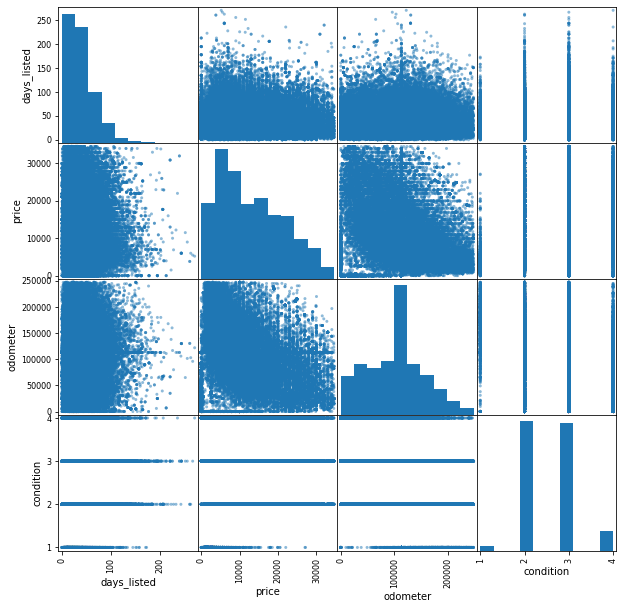

In [29]:
df_parameters2 = df[['days_listed', 'price', 'odometer', 'condition']].copy()
pd.plotting.scatter_matrix(df_parameters2, figsize=(10,10))
plt.show()

In [30]:
quant_var = df[['days_listed', 'price', 'vehicle_age', 'odometer', 'condition', 'cylinders']].copy()
quant_var.corr()

,days_listed,price,vehicle_age,odometer,condition,cylinders
days_listed,1.000000,-0.000459,0.009217,0.006412,0.008961,0.003121
price,-0.000459,1.000000,-0.469187,-0.401724,-0.048225,0.269987
vehicle_age,0.009217,-0.469187,1.000000,0.557044,-0.098194,0.050400
odometer,0.006412,-0.401724,0.557044,1.000000,-0.077033,0.029453
condition,0.008961,-0.048225,-0.098194,-0.077033,1.000000,-0.092697
cylinders,0.003121,0.269987,0.050400,0.029453,-0.092697,1.000000


#### Factors Influencing Ad Lifespans

Focusing on the 'days_listed' row of histograms (far left column of graphs):

1) 'vehicle_age': this graph shows that most vehicles 20 years or younger are being sold within 100 days but as the ad-lifespan grows older, newer vehicles heavily outnumber old vehicles.

2) 'cylinders': 8 and 6 cylinder vehicles were more likely to have a short ad lifespan and 4 cylinder vehicles were more likely to have a longer listing time.

3) 'price': As price declined, the lifespan of the listing became longer. 20,000 dollars and below vehicles more heavily populated the longer listing times.

4) 'odometer': At about 150,000 miles and below, these cars more densely populated the longer listing times (100 days and more). Interestingly, vehicles with miles > 150k were sold more quickly

5) 'condition': Interestingly, vehicles in "excellent" condition were more often listed longer than vehicles in fair condition. 

#### Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. 

In [31]:
type_count = df['type'].value_counts()
type_count
#Trucks and SUVs had the highest number of ads

truck          22635
SUV            17680
sedan          16234
pickup         12714
coupe           5760
wagon           3391
mini-van        1493
hatchback       1314
van              994
convertible      471
offroad          336
other            299
bus               76
Name: type, dtype: int64

In [32]:
type_pivot = df.pivot_table(index='type', values='price').astype('int') #pivot table is used to organize the data
type_pivot.sort_values(by='price', ascending=False)

,price
type,
bus,22575
pickup,19188
coupe,17777
truck,15756
offroad,13486
convertible,11536
other,10867
SUV,10364
wagon,9750


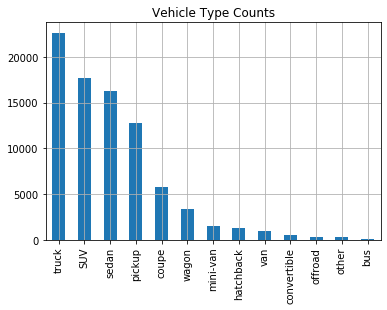

In [33]:
type_count.plot(kind='bar', title='Vehicle Type Counts', grid=True)
ax.set_xlabel('Type')
ax.set_ylabel('Count')
plt.show()

#This graph shows how the frequency of the ads depend on the type - trucks and SUVs are the most listed type

#### What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis

In [34]:
#add type to quant_var
quant_var = df[['type', 'days_listed', 'price', 'vehicle_age', 'odometer', 'condition', 'cylinders']].copy()
SUV_Q = quant_var[quant_var['type'] == 'SUV']
truck_Q = quant_var[quant_var['type'] == 'truck']

#displaying the correlation between quantitative values for SUV and truck
display(SUV_Q.corr())
display(truck_Q.corr())

,days_listed,price,vehicle_age,odometer,condition,cylinders
days_listed,1.000000,-0.018141,0.007924,0.011050,0.001511,0.014238
price,-0.018141,1.000000,-0.414471,-0.334259,0.187005,-0.044606
vehicle_age,0.007924,-0.414471,1.000000,0.545767,-0.273560,0.168017
odometer,0.011050,-0.334259,0.545767,1.000000,-0.307802,0.113324
condition,0.001511,0.187005,-0.273560,-0.307802,1.000000,-0.043815
cylinders,0.014238,-0.044606,0.168017,0.113324,-0.043815,1.000000


,days_listed,price,vehicle_age,odometer,condition,cylinders
days_listed,1.000000,0.017318,0.027193,-0.003227,0.010639,0.010406
price,0.017318,1.000000,-0.364916,-0.236129,0.069956,-0.041749
vehicle_age,0.027193,-0.364916,1.000000,0.402582,-0.173550,-0.062981
odometer,-0.003227,-0.236129,0.402582,1.000000,-0.120596,-0.062432
condition,0.010639,0.069956,-0.173550,-0.120596,1.000000,-0.028921
cylinders,0.010406,-0.041749,-0.062981,-0.062432,-0.028921,1.000000


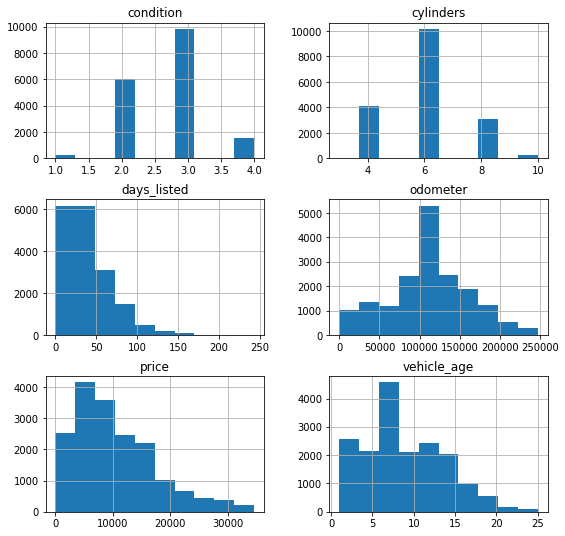

In [35]:
SUV_Q.hist(figsize=(9,9))
plt.show()

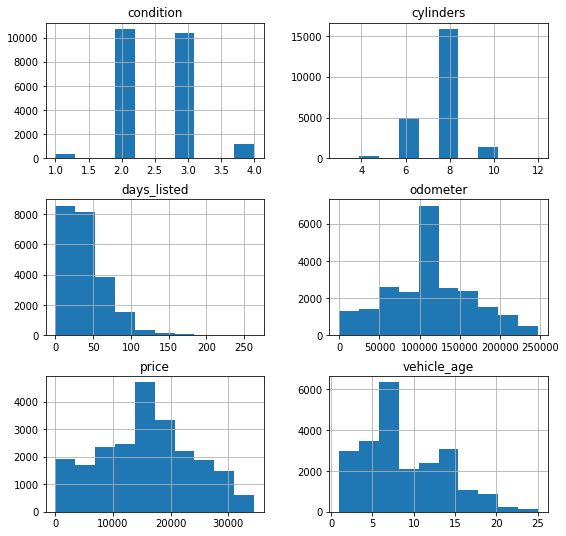

In [36]:
truck_Q.hist(figsize=(9,9))
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


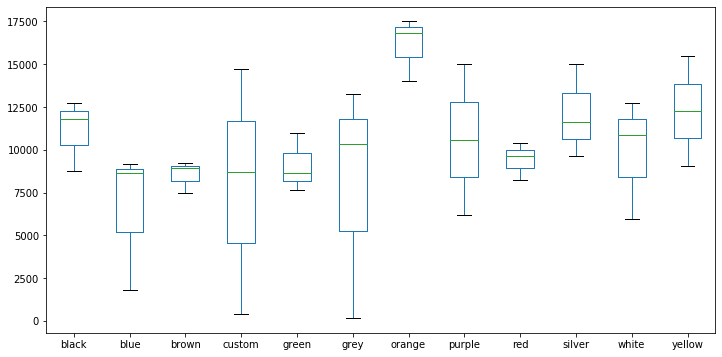

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


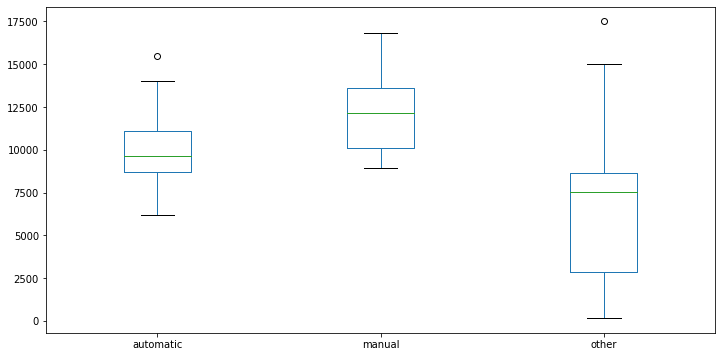

In [37]:
#create pivot tables to organize data for both categorical variables
cat_var = df[['paint_color', 'transmission', 'price', 'type']].copy()

SUV_C = cat_var[cat_var['type'] == 'SUV']
truck_C = cat_var[cat_var['type'] == 'truck']

#starting with SUVs
SUV_color_pivot = SUV_C.pivot_table(index='transmission', columns='paint_color', values='price')
SUV_transmission_pivot = SUV_C.pivot_table(index='paint_color', columns='transmission', values='price')

#plotting them as boxplots
SUV_color_pivot.plot(kind='box', figsize=(12,6))
plt.show()
SUV_transmission_pivot.plot(kind='box', figsize=(12,6))
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


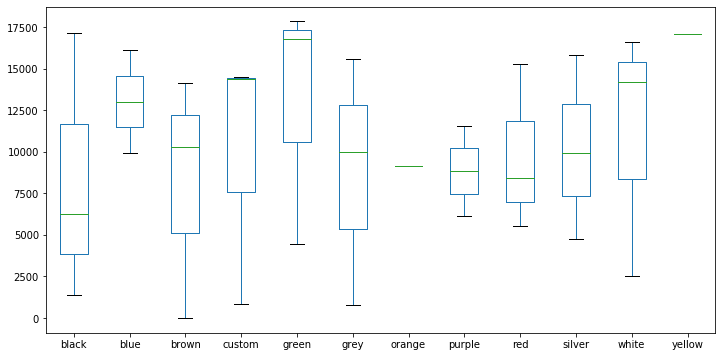

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


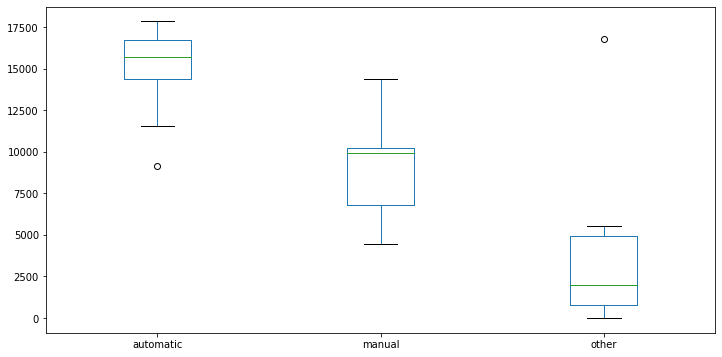

In [38]:
#Same process for trucks
truck_color_pivot = truck_C.pivot_table(index='transmission', columns='paint_color', values='price')
truck_transmission_pivot = truck_C.pivot_table(index='paint_color', columns='transmission', values='price')

#plotting them as boxplots
truck_color_pivot.plot(kind='box', figsize=(12,6))
plt.show()
truck_transmission_pivot.plot(kind='box', figsize=(12,6))
plt.show()

### Truck and SUV analysis

#### Correlation
Referring to the correlation graphs, vehicle age was the highest influencer on price for both SUVs and trucks. 

#### Quantitative Analysis
In regards to the histograms, the prices of SUVs and trucks varied in that most SUVs were 5,000 and trucks were more expensive at 15,000. 

Trucks were sold faster than SUVs -- 8000 trucks were sold under 50 days compared to 6000 for SUVs.

Trucks were more expensive than SUV's -- 4800 trucks at ~15,000 vs. 4200 SUVs at ~5000.

Most SUVs were 6 cylinder and trucks mainly 8.

The odometer readings for trucks and SUVs consolidated at ~125000.

Most trucks and SUVs were aged at 8 years.

#### Categorical Analysis
Referring to the boxplots, orange SUVs were priced as the most expensive (median value ~17,000) while green trucks were most expensive (median value ~17000)

Manual SUVs were found to increase the price (median value ~12,000) while the latter was automatic trucks raising the price (median value ~16,000)



## Overall conclusion

The parameter that had the highest impact on price was vehicle_age because it had the largest correlation coefficient (-0.47). This means age has a negative impact on the price.

Referring to the transmission boxplot, automatics were priced higher than manuals and other types had a wider spread of value.

In terms of color, black, orange, white, and yellow vehicles had the highest average prices.

Trucks and SUVs comprised of most of the listings on the website.

Vans, busses, and pickups were the most expensive vehicle types listed.

Cheaper vehicles (20,000 and lower) had a tendency to stay on the website longer than expensive vehicles (above 20,000).

Vehicles with <= 150k miles were more likely to stay longer on the lot while older vehicles were being sold faster. This may have to do with rare vehicles being more sought after.

The lower cylinder vehicles (4) had longer listing times showing that performance is important in listing times.

The biggest determining factor in price was age for the most popular vehicle types (trucks and SUVs).

Trucks had a tendency to be more expensive.

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

#### DATA PREPROCESSING (10)
- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
#### MAKE CALCULATIONS & ADD TO TABLE (3)
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
#### EXPLORATORY DATA ANALYSIS (9)
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. 
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn